In [1]:
import cv2, time
import matplotlib.pyplot as plt
import numpy as np
import Vision as vis

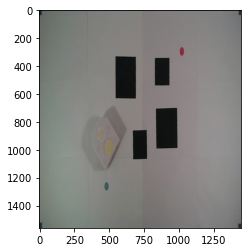

In [2]:
mapw = cv2.imread('warped.png')
plt.figure()
plt.imshow(mapw)
plt.show()

2
(502.0, 983.0)


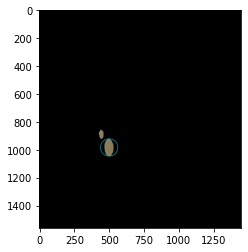

In [9]:
#Repere goal ==> (x,y) = centre du goal
img_goal = mapw.copy()
green_lower=np.array([10,40,40])
green_upper=np.array([40,255,255])
color_infos = (0,255,255)

img_hsv = cv2.cvtColor(img_goal, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(img_hsv, green_lower, green_upper)
img_hsv = cv2.blur(img_hsv,(7,7))
mask = cv2.erode(mask, None, iterations = 4)
mask = cv2.dilate(mask, None, iterations = 4)
image2 = cv2.bitwise_and(img_goal, img_goal, mask=mask)
elements,_ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(elements))
if len(elements) > 0:
    c = max(elements, key=cv2.contourArea)
    ((x,y),rayon) = cv2.minEnclosingCircle(c)
    if rayon>0:
        cv2.circle(image2,(int(x),int(y)), int(rayon), color_infos, 2)
        cv2.circle(img_goal,(int(x),int(y)), 5, color_infos, 10)
        cv2.line(img_goal,(int(x),int(y)), (int(x)+150,int(y)), color_infos, 2)
print((x,y))
plt.figure()
plt.imshow(image2)
plt.show()

In [10]:
def detectCircle(imgRGB,color):
    coord = []
    color_infos = (0,255,255)
    
    if color == 'red':
        lower=np.array([170,50,50])
        upper=np.array([240,255,255])
    if color == 'yellow':
        lower=np.array([10,40,40])
        upper=np.array([40,255,255])
    if color == 'cyan':
        lower=np.array([80,50,50])
        upper=np.array([100,255,255])
    
    img_hsv = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(img_hsv, lower, upper)
    img_hsv = cv2.blur(img_hsv,(7,7))
    mask = cv2.erode(mask, None, iterations = 4)
    mask = cv2.dilate(mask, None, iterations = 4)
    image2 = cv2.bitwise_and(imgRGB, imgRGB, mask=mask)
    elements,_ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if len(elements) > 0:
        for i in range(0,len(elements)):
            c = elements[i] 
            ((x,y),rayon) = cv2.minEnclosingCircle(c)
            coord.append((x,y,rayon))
            if rayon>0:
                cv2.circle(image2,(int(x),int(y)), int(rayon), color_infos, 2)
    return coord


In [11]:
#coordRed = (x,y)

patrice = detectCircle(mapw.copy(),'red')


print(patrice)

[(1022.5, 295.0806579589844, 31.40483283996582)]


In [3]:
patricetest = vis.detectCircle(mapw.copy(),'goal')
print(patricetest)

[1022.5, 295.0806579589844]


In [4]:
patriceteststart = vis.detectCircle(mapw.copy(),'start')
print(patriceteststart)

[483.5, 1263.4583740234375]


In [12]:
coordCyan = detectCircle(mapw.copy(),'cyan')
print(coordCyan[0])

(483.5, 1263.4583740234375, 24.950956344604492)


In [30]:
coordYellow = detectCircle(mapw.copy(),'yellow')
print(coordYellow[0][1])

NameError: name 'detectCircle' is not defined

In [14]:
pts=sorted(coordYellow, key=lambda x: (x[2]))
print(pts)

[(446.5, 889.0, 31.67422103881836), (502.0, 983.0, 62.51409912109375)]


In [15]:
def angle_between(p1, p2):
    p = [p1[0]-p2[0],p1[1]-p2[1]]
    p[1] = -p[1]
    ang = np.arctan2(p[1],p[0])
    return np.rad2deg(ang)

In [16]:
alpha = angle_between((pts[0][0],pts[0][1]), (pts[1][0], pts[1][1]))
print(alpha)



120.5586870707114


In [33]:
alphatest = vis.angle_between((pts[0][0],pts[0][1]), (pts[1][0], pts[1][1]))
print(alphatest)

NameError: name 'pts' is not defined

In [19]:
def directionTymio(imgRGB):
    coordTymio = detectCircle(imgRGB,'yellow')
    pts = sorted(coordTymio, key=lambda x: x[2])
    print(pts)
    top = (pts[0][0],pts[0][1])
    
    bottom = (pts[1][0],pts[1][1])
    print(top,bottom)
    direction = angle_between(top,bottom)
    return [bottom,direction]
    

In [6]:
loc = directionThymio(mapw.copy())
print(loc)

NameError: name 'directionThymio' is not defined

In [4]:
loctest = vis.directionThymio(mapw.copy())
print(loctest)

[(502.0, 983.0), 120.5586870707114]


In [23]:
x = loctest[0][0]
print(x)

502.0
